# Employee Turnover Prediction Starter Workbook

This workbook was started by the data scientist who originally worked on this project. It is organized around the following steps:
1. Import and Clean data
2. Explore data
3. Model features
4. Model data
5. Evaluate models

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE 
import re

## 1. Import and Clean Data

In [3]:
#Read in the data files
data = pd.read_csv("../Hr Analytics/data/general_data.csv",sep=",")

In [4]:
#Examine the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,...,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,...,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,...,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,...,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,...,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [6]:
#Let's view some of the sample data
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [7]:
#Determine the shape of the data frame. 
data.shape

(4410, 29)

#### Design Note 1.1

The data frame is 4410 rows x 24 columns. ```Attrition``` is a dichotomous ("Yes/No") field that indicates if the employee left the organization. This variable will serve as our response variable (i.e. y-variable in the logistic model). The other columns listed are potenial predictor variables. We should do some exploratory data analysis to see which potential predictors have the most potential for modeling. 

In [8]:
#Let's look at the descriptives. Questions we may ask:
#1. Are the minimums and maximums reasonable?
#2. What do the means tell us about the nature of the sample?
#3. Are there any columns that lack variance necessary for value in prediction?
data.describe().round(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4391.0,4410.0,4410.0,4410.0,4401.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4385.0,4390.0,4388.0
mean,36.9,8.0,2.9,1.0,2205.5,2.1,65029.3,2.7,14.4,8.0,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0
std,9.1,7.1,1.0,0.0,1273.2,1.1,47068.9,2.5,4.2,0.0,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9
min,18.0,1.0,1.0,1.0,1.0,1.0,10090.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
25%,30.0,2.0,2.0,1.0,1103.2,1.0,29110.0,1.0,12.0,8.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
50%,36.0,6.0,3.0,1.0,2205.5,2.0,49190.0,2.0,14.0,8.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
75%,43.0,12.0,4.0,1.0,3307.8,3.0,83800.0,4.0,17.0,8.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0
max,60.0,35.0,5.0,1.0,4410.0,5.0,199990.0,9.0,25.0,8.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0


#### Design Note 1.2

We should note which variables are categorical (nominal, ordinal) and which are quantitative (numeric).

Categorical:

```Attrition```
```BusinessTravel```
```Education```
```EducationField```
```JobLevel```
```Gender```
```Department```
```JobRole```
```MaritalStatus```
```Over18```
```StockOptionLevel```

Quantitative:

```DistanceFromHome```
```EmployeeCount```
```EmployeeID``` 
```MonthlyIncome``` 
```NumCompaniesWorked```
```PercentSalaryHike```
```StandardHours```
```TotalWorkingYears```
```TrainingTimesLastYear``` 
```YearsAtCompany``` 
```YearsSinceLastPromotion```
```YearsWithCurrManager```

In [8]:
#A significant step in data cleaning is identifying and mitigating missing (null) values.
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
PerformanceRating           0
JobInvolvement              0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            22
dtype: int64

In [9]:
#One hot encode for all missing values in columns: training
data['NumCompaniesWorked_Missing'] = np.where(data['NumCompaniesWorked'] >= 0, 1, 0)
data['TotalWorkngYears_Missing'] = np.where(data['TotalWorkingYears'] >= 0, 1, 0)
data['EnvironmentSatisfaction_Missing'] = np.where(data['EnvironmentSatisfaction'] >= 0, 1, 0)
data['JobSatisfaction_Missing'] = np.where(data['JobSatisfaction'] >= 0, 1, 0)
data['WorkLifeBalance_Missing'] = np.where(data['WorkLifeBalance'] >= 0, 1, 0)

In [11]:
#Find the mean of each variable.
data.mean().round(1)

Age                                   36.9
DistanceFromHome                       8.0
Education                              2.9
EmployeeCount                          1.0
EmployeeID                          2205.5
JobLevel                               2.1
MonthlyIncome                      65029.3
NumCompaniesWorked                     2.7
PercentSalaryHike                     14.4
StandardHours                          8.0
StockOptionLevel                       0.8
TotalWorkingYears                     11.3
TrainingTimesLastYear                  2.8
YearsAtCompany                         7.0
YearsSinceLastPromotion                2.2
YearsWithCurrManager                   4.1
PerformanceRating                      3.0
JobInvolvement                         3.0
EnvironmentSatisfaction                2.9
JobSatisfaction                        3.1
WorkLifeBalance                        3.0
NumCompaniesWorked_Missing             1.0
TotalWorkngYears_Missing               1.0
Environment

In [12]:
#Replace the null values with the mean of each column
data=data.fillna(data.mean())

In [13]:
#Confirm that our imputation strategy was successful.
data.isnull().any()    # No Null value

Attrition                          False
Age                                False
BusinessTravel                     False
Department                         False
DistanceFromHome                   False
Education                          False
EducationField                     False
EmployeeCount                      False
EmployeeID                         False
Gender                             False
JobLevel                           False
JobRole                            False
MaritalStatus                      False
MonthlyIncome                      False
NumCompaniesWorked                 False
Over18                             False
PercentSalaryHike                  False
StandardHours                      False
StockOptionLevel                   False
TotalWorkingYears                  False
TrainingTimesLastYear              False
YearsAtCompany                     False
YearsSinceLastPromotion            False
YearsWithCurrManager               False
PerformanceRatin

## 2. Explore

#### Design note 2.1
With the data imported and cleaned, we can now move on to exploring the data. We already have some very basic insights from our quality tests above. Given some of what we have discovered in Section 1 (import and clean), we can drop a few variables that will not help us in our goal of modeling employee turnover. ```EmployeeCount```, ```StandardHours```, and ```Over18``` should be dropped because they have no variation (all the same values for the entire column). ```EmployeID```is only used to identify the employee and has no other value. After we drop the unecessary variables, we can begin our exploratory data analysis (EDA) by looking how the variables are correlated with our response variable, ```Attrition```.

In [10]:
#Drop unecessary columns
data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1,inplace=True)

In [11]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

In [12]:
data.set_index('Attrition').to_csv("../Hr Analytics/data/data_cleaned.csv")

In [13]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkngYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
0,0,51,Travel_Rarely,Sales,5,2,Life_Sciences,Female,1,Healthcare_Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1
1,0,32,Travel_Frequently,Research_Development,14,4,Other,Male,4,Sales_Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1
2,0,38,Non-Travel,Research_Development,2,5,Life_Sciences,Male,3,Human_Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1
3,0,32,Travel_Rarely,Research_Development,8,1,Medical,Male,1,Sales_Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1
4,0,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,Female,4,Research_Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1


In [14]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'NumCompaniesWorked_Missing', 'TotalWorkngYears_Missing',
       'EnvironmentSatisfaction_Missing', 'JobSatisfaction_Missing',
       'WorkLifeBalance_Missing'],
      dtype='object')

In [15]:
#Make a list of variables for correlation

corr_cols = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance' ]]

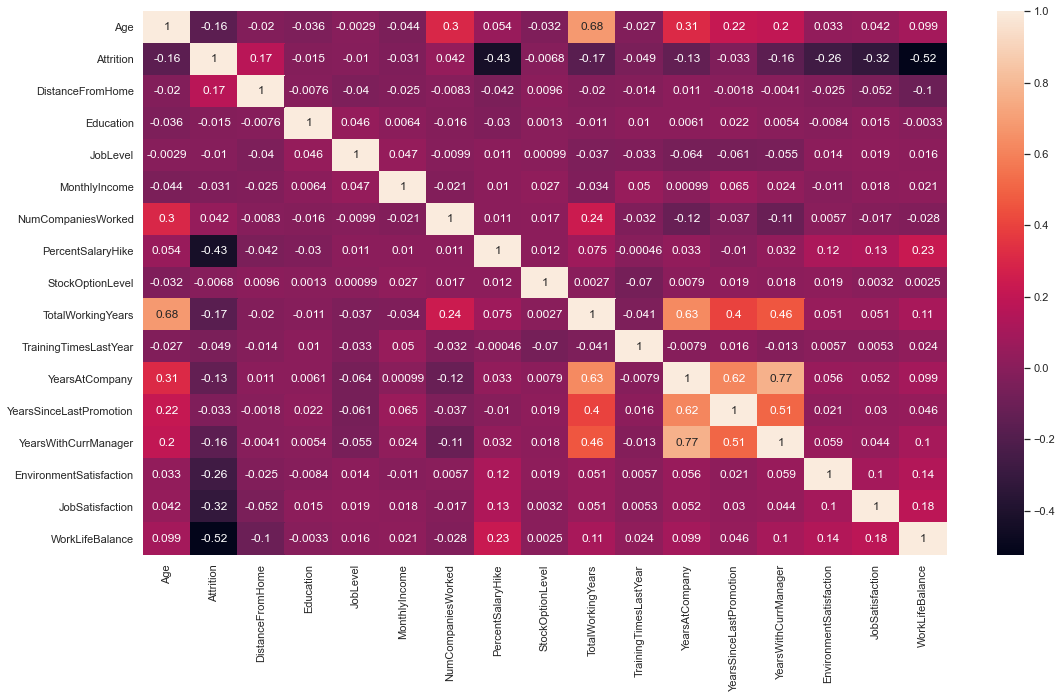

In [16]:
corr = corr_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [17]:
df_cor = corr[['Attrition']].sort_values('Attrition',ascending=True)[:-1]
var_names = []

for x in df_cor.index:
    var_names.append(' '.join(re.findall('[A-Z][^A-Z]*', x)))
    
df_cor['Metric'] = var_names

In [18]:
pred_vars = ['WorkLifeBalance','PercentSalaryHike','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome',
            'MonthlyIncome','TrainingTimesLastYear']
df_cor['Prediction Var'] = 0
df_cor.loc[df_cor.index.isin(pred_vars),'Prediction Var'] = 1

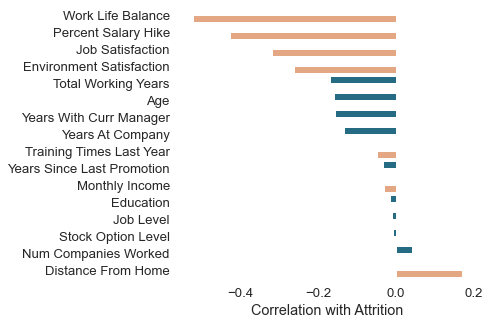

In [19]:
sns.set(font = 'sans-serif',font_scale = 1.2)
sns.set_style('dark')
fig = plt.figure()
ax = sns.barplot(data=df_cor.rename(columns={'Attrition':'Correlation with Attrition'}),x='Correlation with Attrition',
                 y='Metric',orient='h',hue='Prediction Var',palette=['#157394','#F4A374'])
ax.get_legend().remove()

# ax.set_axis_off()
ax.get_yaxis().set_label_text('')

plt.tight_layout()
plt.box(False)
# plt.grid(axis='x')

fig.set_size_inches(8,5,forward=True)
fig.savefig('temp.png', transparent=True,)

# ax.yaxis.set_ticklabels([])

In [22]:
strong_corr_vars = ['Attrition','DistanceFromHome','WorkLifeBalance','PercentSalaryHike',
                    'JobSatisfaction','EnvironmentSatisfaction','YearsWithCurrManager','Age','YearsAtCompany']

In [23]:
# Explore a difference between Male and Female employees
m_strong_cor = data.loc[data.Gender == 'Male',strong_corr_vars].corr()
f_strong_cor = data.loc[data.Gender == 'Female',strong_corr_vars].corr()

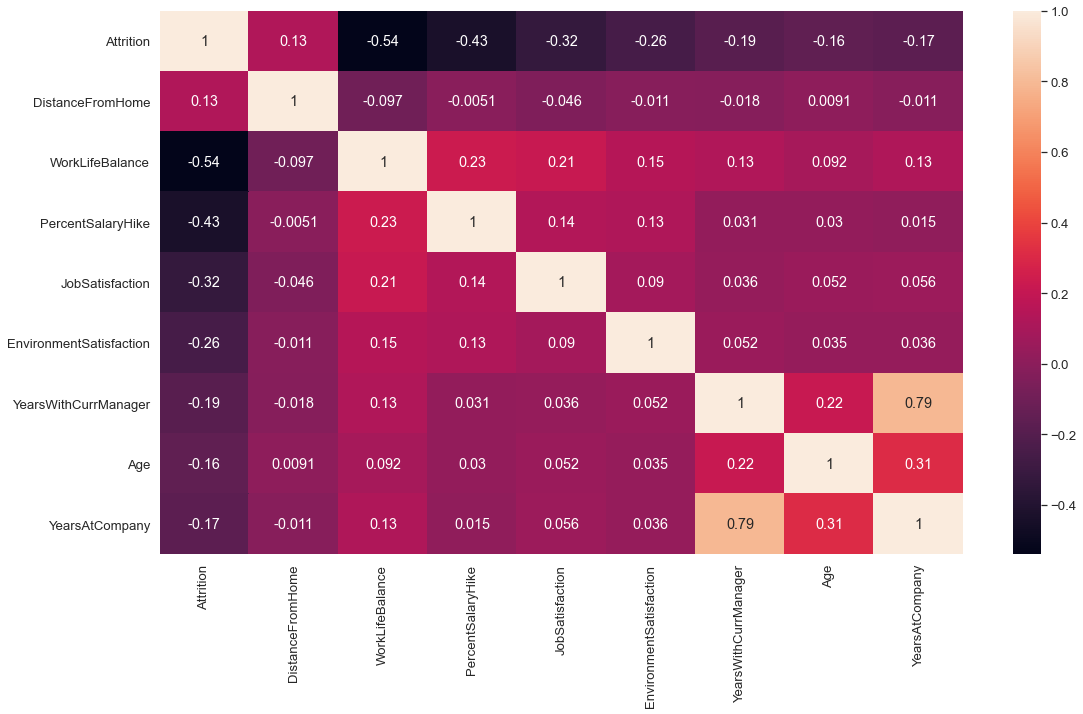

In [24]:
plt.figure(figsize=(18,10))
sns.heatmap(m_strong_cor, annot = True)
plt.show()

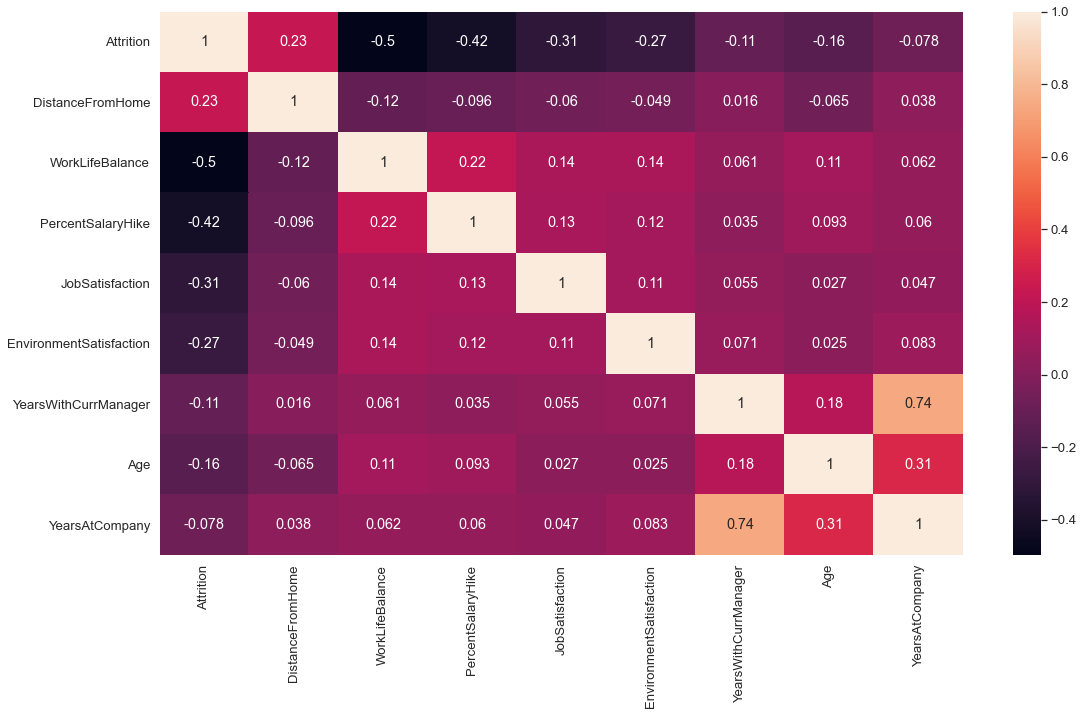

In [25]:
plt.figure(figsize=(18,10))
sns.heatmap(f_strong_cor, annot = True)
plt.show()

Looking above, we can get a general sense of some of the relationships at play with our data.

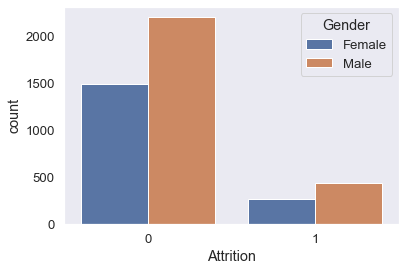

In [26]:
sns.countplot(x = "Attrition",data=data,hue="Gender")
plt.show()

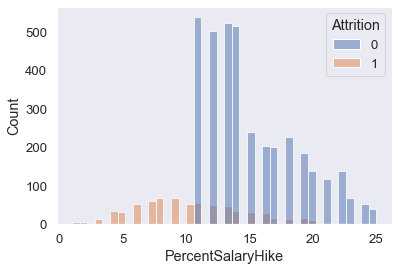

In [27]:
sns.histplot(x = "PercentSalaryHike",data=data,hue="Attrition")
plt.show()

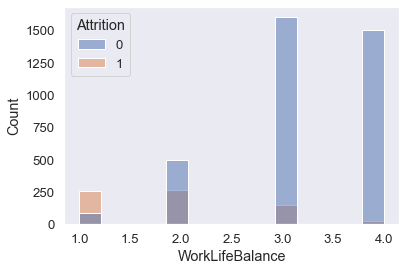

In [28]:
sns.histplot(x = "WorkLifeBalance",data=data,hue="Attrition")
plt.show()

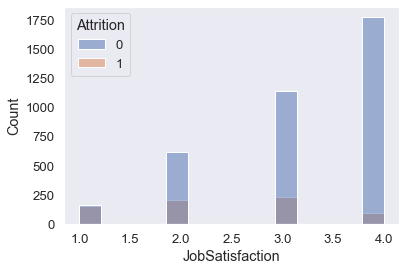

In [29]:
sns.histplot(x = "JobSatisfaction",data=data,hue="Attrition")
plt.show()

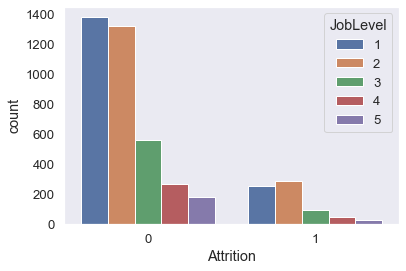

In [30]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel")
plt.show()

In [31]:
#Bin the age variable into buckets for easier EDA
data['Age_Bin']=pd.cut(x = data['Age'],
                        bins = [0,30,40,50,60], 
                        labels = [0, 1, 2,3])

In [32]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'NumCompaniesWorked_Missing', 'TotalWorkngYears_Missing',
       'EnvironmentSatisfaction_Missing', 'JobSatisfaction_Missing',
       'WorkLifeBalance_Missing', 'Age_Bin'],
      dtype='object')

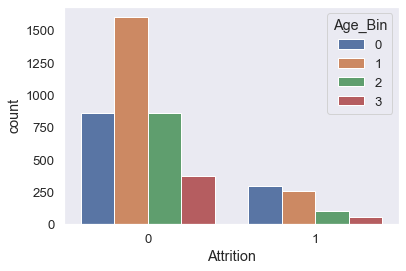

In [33]:
sns.countplot(x = "Attrition",data=data,hue="Age_Bin")
plt.show()

In [34]:
data.groupby('Attrition').mean().round(1)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkngYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,37.6,7.4,2.9,2.1,65672.6,2.6,15.2,0.8,11.9,2.8,7.4,2.2,4.4,3.1,3.2,3.1,3.2,3.2,1.0,1.0,1.0,1.0,1.0
1,33.6,10.7,2.9,2.0,61682.6,2.9,10.3,0.8,8.3,2.7,5.1,1.9,2.9,2.2,2.3,2.3,2.4,1.9,1.0,1.0,1.0,1.0,1.0


In [35]:
#For reference, let's view the data in the categorical predictors. What are the unique values in each variable?
print(data['BusinessTravel'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['Department'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree' 'HR']
['Female' 'Male']
['Sales' 'Research_Development' 'Human_Resources']
['Healthcare_Representative' 'Sales_Executive' 'Human_Resources'
 'Research_Director' 'Laboratory _Technician' 'Manufacturing_Director'
 'Sales_Representative' 'Manager' 'Research_Scientist']
['Married' 'Single' 'Divorced']


In [36]:
#Convert the Categorical Variables to dummy variables. We use the drop_first=True option to eliminate the first 

In [37]:
df = pd.get_dummies(data, columns=['Gender', 'JobRole', 'BusinessTravel','Education','EducationField','JobLevel','MaritalStatus','Department','StockOptionLevel'],drop_first=True)

In [38]:
#View the results of the dummy variable process.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Attrition                         4410 non-null   int32   
 1   Age                               4410 non-null   int64   
 2   DistanceFromHome                  4410 non-null   int64   
 3   MonthlyIncome                     4410 non-null   int64   
 4   NumCompaniesWorked                4391 non-null   float64 
 5   PercentSalaryHike                 4410 non-null   int64   
 6   TotalWorkingYears                 4401 non-null   float64 
 7   TrainingTimesLastYear             4410 non-null   int64   
 8   YearsAtCompany                    4410 non-null   int64   
 9   YearsSinceLastPromotion           4410 non-null   int64   
 10  YearsWithCurrManager              4410 non-null   int64   
 11  PerformanceRating                 4410 non-null   int64 

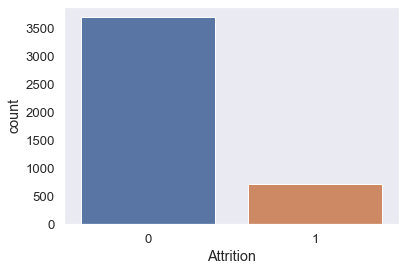

The percentage of employees leaving is 16%


In [39]:
sns.countplot(x = "Attrition",data=data)
plt.show()
print('The percentage of employees leaving is ' +  "{:.0%}".format(df['Attrition'].mean()))

Before we can balance our response variable with SMOTE, we need to separate our validation and test set (so we do not alter its composition). We want to keep the imbalance in test because that is our reality-check. We remove the imbalance in the training data to improve the model performance, which we can validate on the unbalanced test set. 

In [40]:
#Use the function below to create a training [70%], validation [15%], and test set [15%].
def train_validate_test_split(df, train_percent=.7, validate_percent=.15, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [41]:
train, validate, test = train_validate_test_split(df)

In [42]:
#set the smote up
y = train['Attrition']
X = train.drop(['Attrition'], axis = 1)
sm = SMOTE(random_state=42)

In [43]:
X_sm, y_sm = sm.fit_resample(X, y)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
#Notice that the shape of X before and after rebalancing. 
#The data frame has grown to include more cases of where employee attrition = 1. 
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

NameError: name 'X_sm' is not defined

In [35]:
#Check that response variable is now balanced (i.e. 50% of the cases are when attrition = 1)
y_sm.mean()

0.5

In [36]:
#Remerge the data
tr_sm = pd.concat([y_sm, X_sm], axis=1)
tr_sm.shape

(5256, 53)

Now that we have addressed some of the basic issues with our original data, we can export the train, validate, and move on to the model building phase.

In [37]:
train.to_csv(r'../Hr Analytics/data/train.csv')
validate.to_csv(r'../Hr Analytics/data/validate.csv')
test.to_csv(r'../Hr Analytics/data/test.csv')